# Step 1 - Reading The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/2024_S1_Teaching

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
!pip install scikit-learn==1.2.2

df = pd.read_csv('/content/drive/MyDrive/2024_S1_Teaching/train-data.csv',
                 encoding='latin')
# Removing Duplicates
df = df.drop_duplicates()

df.head(10)
df.tail(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/2024_S1_Teaching


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6009,6009,Toyota Camry Hybrid,Mumbai,2015,33500,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,NaN,19.75
6010,6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20
6011,6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.0 kmpl,3597 CC,262.6 bhp,5.0,NaN,4.75
6012,6012,Toyota Innova 2.5 V Diesel 7-seater,Coimbatore,2011,45004,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,9.48
6013,6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,4.83
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


# Step 2 - Problem Statement Definition

Creating a prediction model to return the price of a used car based on a number of input variables.

Target Variables: Price

Predictors: Year, Kilometers_Driven, Transmission, Mileage, Engine, Power, Seats, Engine.

# Step 3 - Target Variable Identification

The target Variable is the Price value as it is to be predicted using other variables present.

# Step 4 - Visualising the distribution of Target variable

In [ ]:
# Removing outliers in price
Q1 = df['Price'].quantile(0.25)
Q2 = df['Price'].quantile(0.5)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

u_limit = Q3 + (1.5*IQR)
l_limit = Q1 - (1.5*IQR)

df = df[~((df['Price'] < l_limit) | (df['Price'] > u_limit))]

<Axes: >

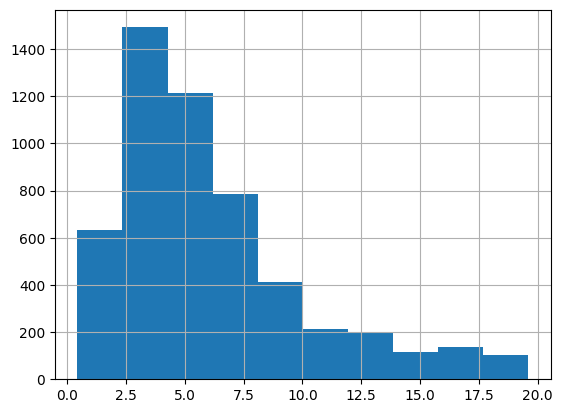

In [ ]:
# Displaying The Histogram
%matplotlib inline
df['Price'].hist()

# Step 5 - Data exploration at basic level


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5301 non-null   int64  
 1   Name               5301 non-null   object 
 2   Location           5301 non-null   object 
 3   Year               5301 non-null   int64  
 4   Kilometers_Driven  5301 non-null   int64  
 5   Fuel_Type          5301 non-null   object 
 6   Transmission       5301 non-null   object 
 7   Owner_Type         5301 non-null   object 
 8   Mileage            5299 non-null   object 
 9   Engine             5267 non-null   object 
 10  Power              5267 non-null   object 
 11  Seats              5261 non-null   float64
 12  New_Price          654 non-null    object 
 13  Price              5301 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 621.2+ KB


In [ ]:
df.head(15)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [ ]:
df.tail(15)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6002,6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,11.91 Lakh,3.25
6003,6003,Maruti Celerio VXI,Bangalore,2015,67600,Petrol,Manual,First,23.1 kmpl,998 CC,67.04 bhp,5.0,NaN,4.00
6004,6004,Hyundai Getz GLE,Coimbatore,2007,66800,Petrol,Manual,First,15.3 kmpl,1341 CC,83 bhp,5.0,NaN,2.20
6005,6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.93 Lakh,7.43
6006,6006,Mercedes-Benz M-Class ML 320 CDI,Mumbai,2009,102002,Diesel,Automatic,First,8.7 kmpl,2987 CC,224.34 bhp,5.0,NaN,10.75
6007,6007,Maruti Swift Dzire Vdi BSIV,Delhi,2011,68000,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0,NaN,2.75
6010,6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20
6011,6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.0 kmpl,3597 CC,262.6 bhp,5.0,NaN,4.75
6012,6012,Toyota Innova 2.5 V Diesel 7-seater,Coimbatore,2011,45004,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,9.48
6013,6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,4.83


In [ ]:
df.nunique()

Unnamed: 0           5301
Name                 1656
Location               11
Year                   22
Kilometers_Driven    2739
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               391
Engine                129
Power                 309
Seats                   9
New_Price             431
Price                 987
dtype: int64

Step 5 - Observations

Some data types are object due to having str mixing with numbers converting them from a float64 to an object

# Step 6 - Identifying and Rejecting useless columns

In [ ]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 34
Power                  34
Seats                  40
New_Price            4647
Price                   0
dtype: int64

New_Price is nearly 90% Null variables so it is better to drop the column

In [ ]:
del df['New_Price']
df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               34
Power                34
Seats                40
Price                 0
dtype: int64

Drop rows with null values

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

With New_Price dropped the null values return to the minority and can be fixed using other methods

# Step 7 - Visual Exploratory Data Analysis of data (with Histogram and Bar charts)

In [ ]:
def plot_graphs(data_input, columns):
  %matplotlib inline
  import matplotlib.pyplot as plt
  fig, subPlot=plt.subplots(nrows=1, ncols=len(columns), figsize=(15,4))
  fig.suptitle(str(columns))

  for column_name, plot_number in zip(columns, range(len(columns))):
    data_input.groupby(column_name).size().plot(kind='bar',ax=subPlot[plot_number])

In [ ]:
df.Power.replace('bhp', '', regex=True, inplace=True)
df.Engine.replace('\D+', '', regex=True, inplace=True)
df.Mileage.replace('kmpl', '', regex=True, inplace=True)

In [ ]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
df['Power'].head(10)
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Engine'].head(10)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Mileage'].head(10)

0      NaN
1    19.67
2    18.20
3    20.77
4    15.20
5      NaN
6    23.08
7    11.36
8    20.54
9    22.30
Name: Mileage, dtype: float64

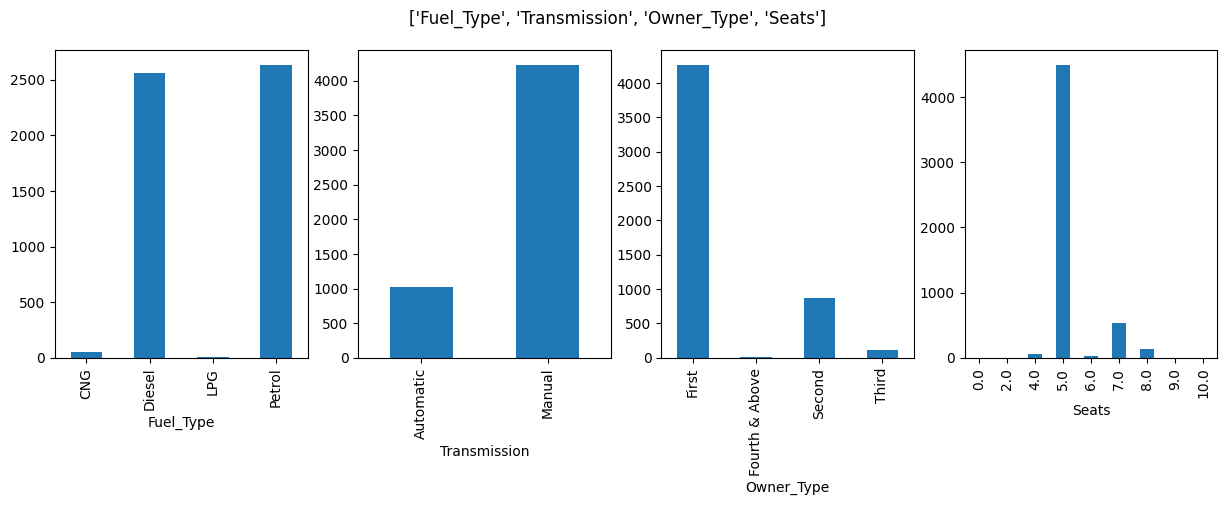

In [ ]:
plot_graphs(data_input=df, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'])

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Power'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Mileage'}>]], dtype=object)

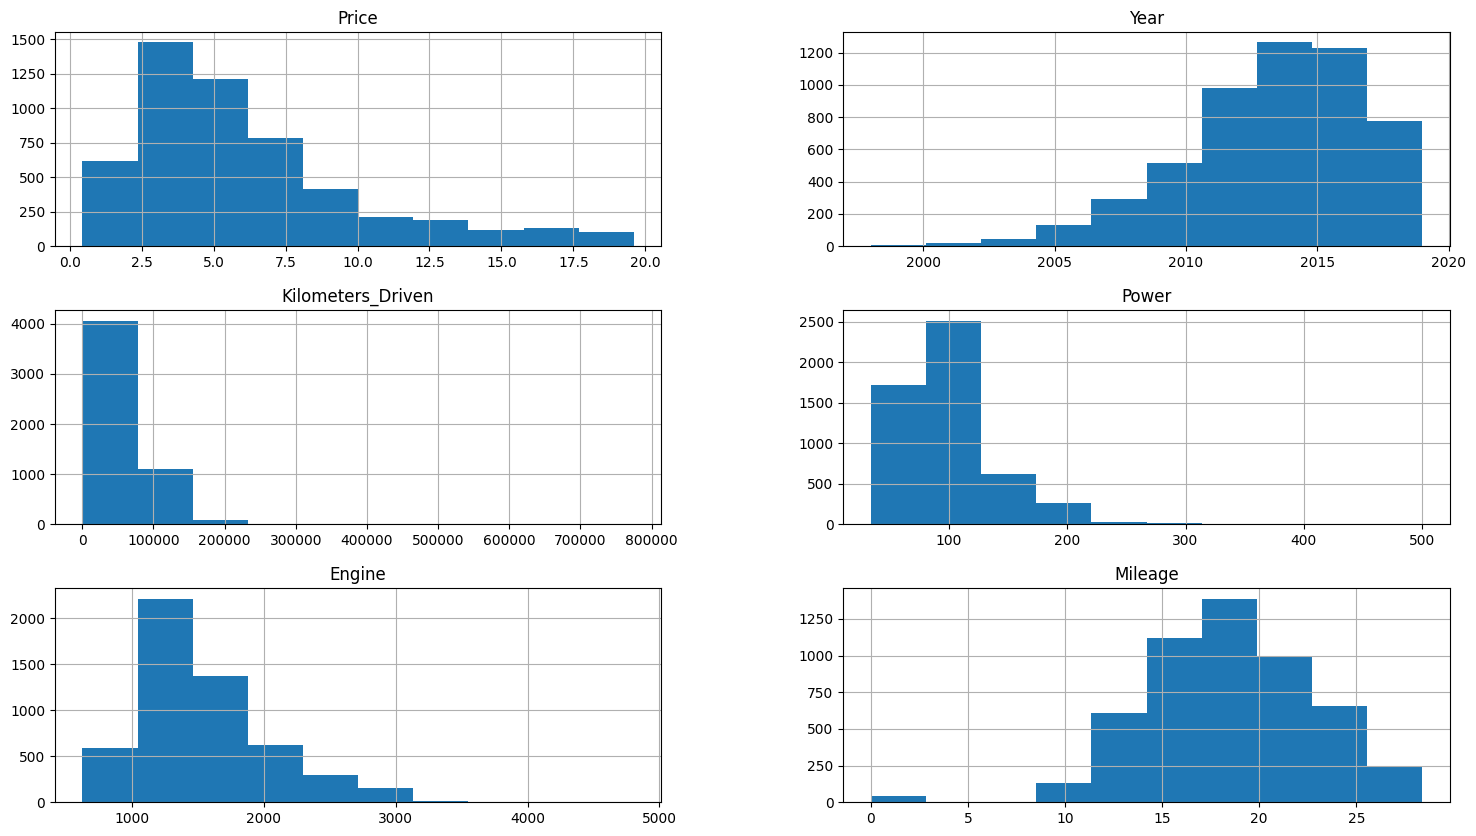

In [ ]:
df.hist(['Price', 'Year', 'Kilometers_Driven', 'Power', 'Engine', 'Mileage'], figsize=(18,10))

# Step 8 - Feature Selection based on data distribution

*   Price vs Year - Scatter
*   Price vs Engine - Scatter
*   Price vs Mileage - Scatter
*   Price vs Kilometers_Driven - Scatter
*   Price vs Fuel_Type - Box Plot
*   Price vs Owner_Type - Box Plot

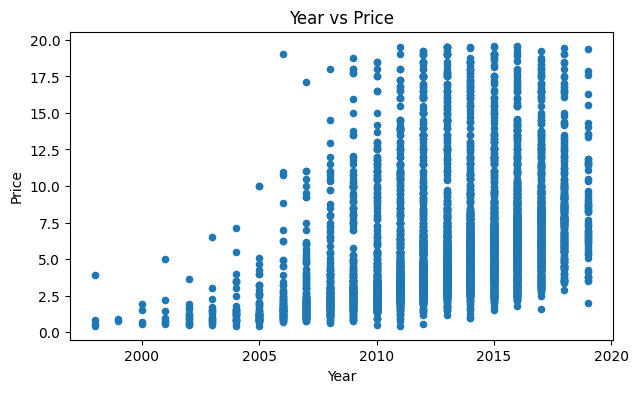

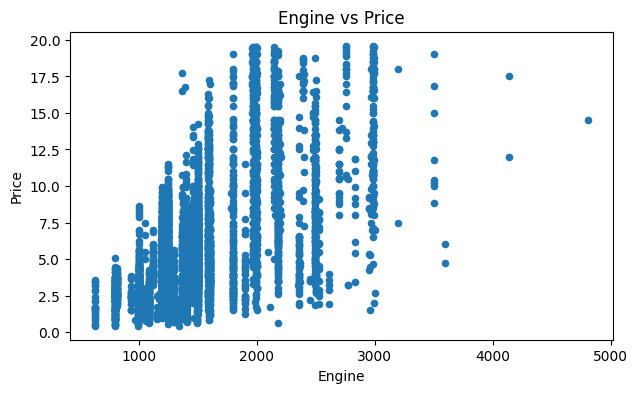

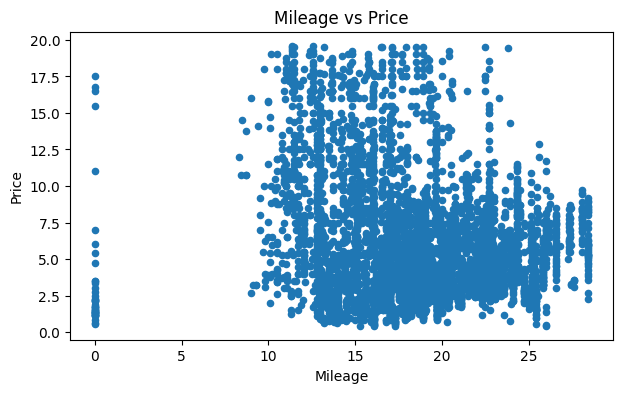

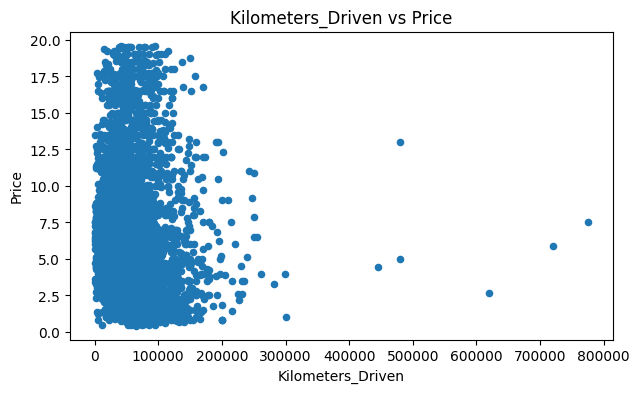

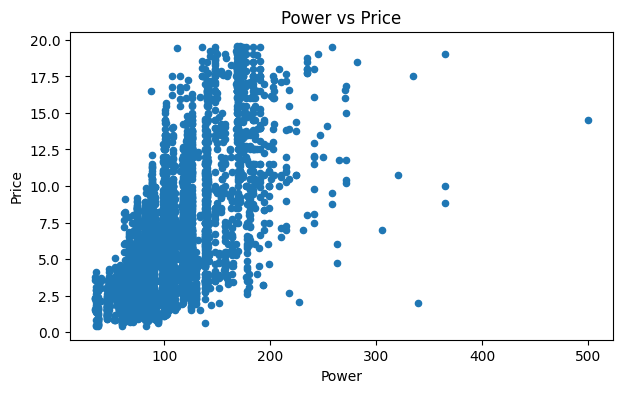

In [ ]:
cont_data = ['Year', 'Engine', 'Mileage', 'Kilometers_Driven', 'Power']
for data in cont_data:
  df.plot.scatter(x=data, y='Price', figsize=(7,4), title=f'{data} vs Price')

Some data looks heavely skeewed so it would be best to remove outliers

In [ ]:
def remove_outliers(Columns):
  global df
  for x in Columns:
    Q1 = df[f'{x}'].quantile(0.25)
    Q2 = df[f'{x}'].quantile(0.5)
    Q3 = df[f'{x}'].quantile(0.75)
    IQR = Q3 - Q1

    u_limit = Q3 + (1.5*IQR)
    l_limit = Q1 - (1.5*IQR)

    df = df[~((df[f'{x}'] < l_limit) | (df[f'{x}'] > u_limit))]

In [ ]:
remove_outliers(cont_data)

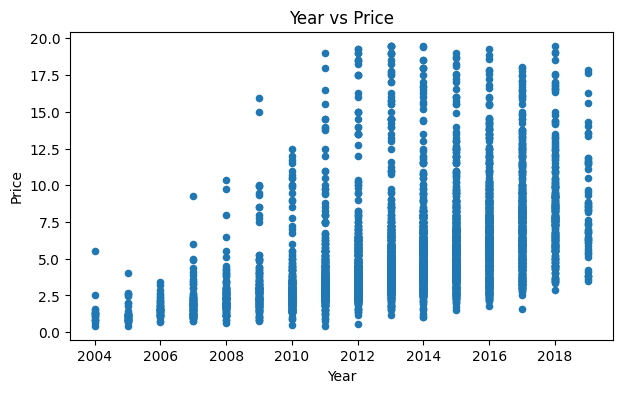

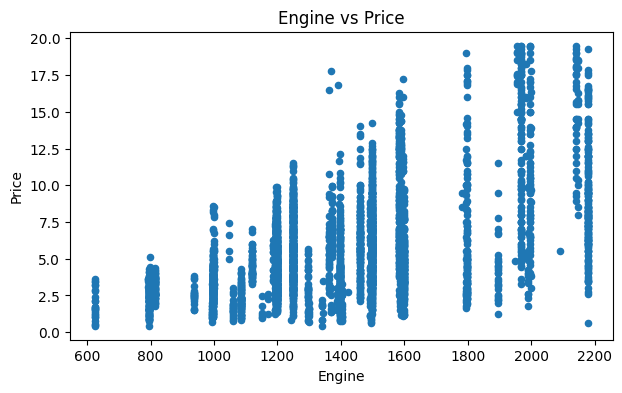

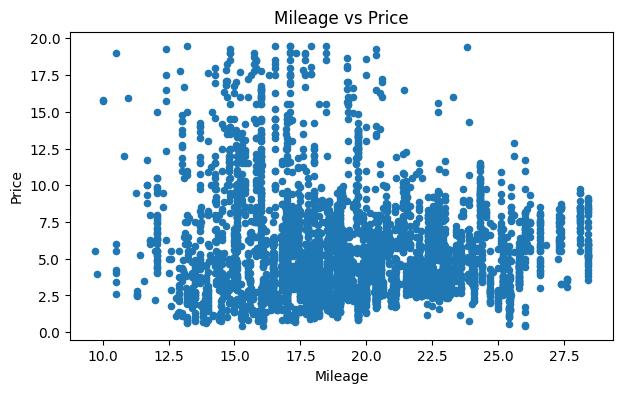

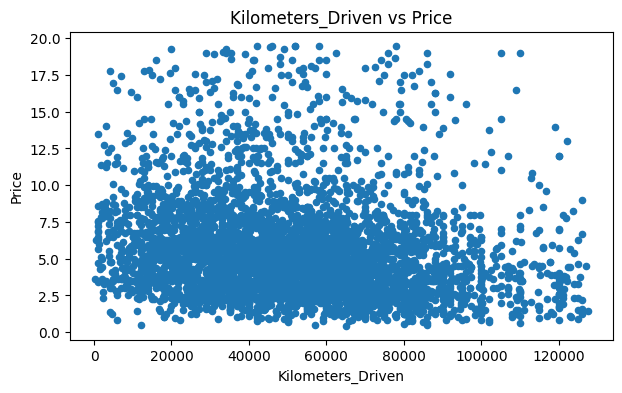

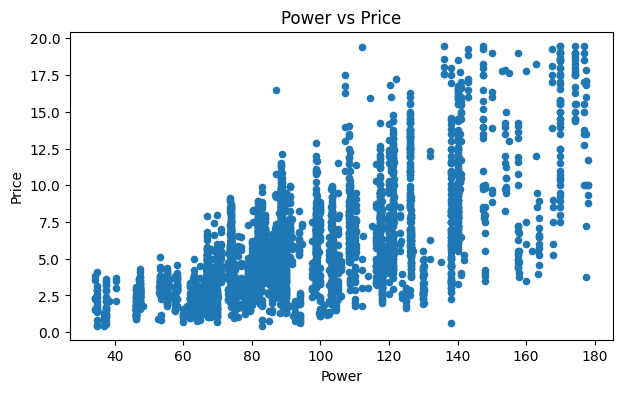

In [ ]:
for data in cont_data:
  df.plot.scatter(x=data, y='Price', figsize=(7,4), title=f'{data} vs Price')

Some values look better such as Engine Vs Price and Year Vs Price and Kilometeres_Driven vs Price but mileage Vs Price look like they have little corelation with price value

# Step 11 - Data Conversion To Numerics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4455 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4455 non-null   int64  
 1   Name               4455 non-null   object 
 2   Location           4455 non-null   object 
 3   Year               4455 non-null   int64  
 4   Kilometers_Driven  4455 non-null   int64  
 5   Fuel_Type          4455 non-null   object 
 6   Transmission       4455 non-null   object 
 7   Owner_Type         4455 non-null   object 
 8   Mileage            4389 non-null   float64
 9   Engine             4455 non-null   int64  
 10  Power              4393 non-null   float64
 11  Seats              4455 non-null   float64
 12  Price              4455 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 487.3+ KB


No action is needed as all relevant data was already converted to numeric values such as float64

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              66
Engine                0
Power                62
Seats                 0
Price                 0
dtype: int64

Null values arose when numeric coversion happend so drop all rows with null values

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# Step 12 - Training/Testing Sampling and K-fold cross validation

In [ ]:
data_cont_columns = ['Price', 'Year', 'Engine', 'Mileage',
                'Kilometers_Driven', 'Power']
data = df[data_cont_columns].corr()
data['Price'][abs(data['Price']) > 0.45]

Price     1.000000
Year      0.474027
Engine    0.572026
Power     0.669284
Name: Price, dtype: float64

Year, Engine, And Power have a good corelation with Price so they will be used as the variables

In [ ]:
selected_cont_columns = ['Year', 'Engine', 'Power', 'Price']
ML_data = df[selected_cont_columns]
ML_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4328 entries, 1 to 6018
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    4328 non-null   int64  
 1   Engine  4328 non-null   int64  
 2   Power   4328 non-null   float64
 3   Price   4328 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 169.1 KB


In [ ]:
target = 'Price'
predictors = ['Year', 'Engine', 'Power']

x = ML_data[predictors].values
y = ML_data[target].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

MLR Model

R2: 0.692029157884499

R2 Values for KFold = 30:
 [0.63765335 0.67239446 0.7080268  0.64849735 0.71210184 0.72137829
 0.60154521 0.6933877  0.57725119 0.66525655 0.72580261 0.67817
 0.67968887 0.66134443 0.73413217 0.6627173  0.70521611 0.68642054
 0.66253559 0.69610575 0.73356441 0.68837115 0.6664627  0.67392365
 0.71347921 0.63608304 0.71298757 0.75831573 0.65607718 0.70019443]

R2 average : 0.6823028398432238



{'whiskers': [<matplotlib.lines.Line2D at 0x7d9c0999f370>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9c0999f8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9c0999f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9c0999fcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9c0999ff70>],
 'means': []}

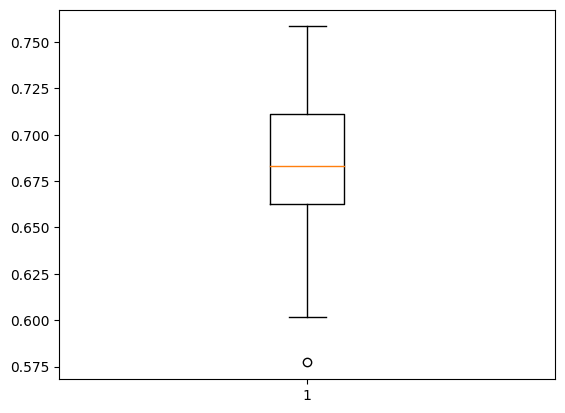

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

from sklearn import metrics
print('R2:',metrics.r2_score(y_train, lr.predict(x_train)))
# KFold
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=30)
scores = cross_val_score(lr, x, y, cv = kf)
print('')
print(f'R2 Values for KFold = 30:\n {scores}')
print('')
print(f'R2 average : {np.average(scores)}')
print('')
# Visual Display
import matplotlib.pyplot as plt

plt.boxplot(scores)

# Step 13 - Investigating multiple Regression algorithms

Tree Regressor

R2: 0.9444971389474618

R2 Values for KFold = 30:
 [0.89263926 0.84561512 0.86144612 0.74580165 0.81709709 0.85094562
 0.77351324 0.72949135 0.80742412 0.87194752 0.86410022 0.83509356
 0.87047255 0.84801334 0.89452034 0.85539073 0.80284824 0.79255924
 0.84028755 0.85053497 0.75742376 0.89596505 0.84137253 0.84392717
 0.84940416 0.75649399 0.85113957 0.89778799 0.84376025 0.8318638 ]

R2 average : 0.8339626698103171



{'whiskers': [<matplotlib.lines.Line2D at 0x7d9c09b0fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9c09b0dc30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9c09b0e8f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9c09b0c220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9c09b0c820>],
 'means': []}

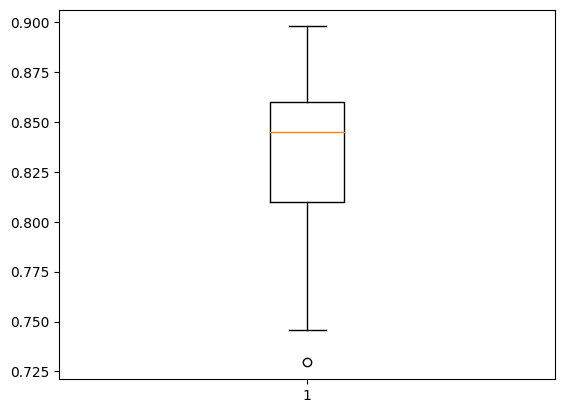

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tr = DecisionTreeRegressor(max_depth=20, criterion='friedman_mse')

tr.fit(x_train, y_train)

from sklearn import metrics
print('R2:',metrics.r2_score(y_train, tr.predict(x_train)))
# KFold
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=30)
scores = cross_val_score(tr, x, y, cv = kf)
print('')
print(f'R2 Values for KFold = 30:\n {scores}')
print('')
print(f'R2 average : {np.average(scores)}')
print('')
# Visual Display
import matplotlib.pyplot as plt

plt.boxplot(scores)

Random Forest Regressor

R2: 0.9371396898473913

R2 Values for KFold = 30:
 [0.89733281 0.86528494 0.87334766 0.78276387 0.89034753 0.87261101
 0.76648802 0.75662361 0.81722984 0.89017321 0.87518677 0.86481511
 0.8853106  0.8805666  0.90366101 0.84887475 0.8602448  0.81456946
 0.86404906 0.87169476 0.77019895 0.91129958 0.81657287 0.86759417
 0.90761696 0.8194197  0.84826811 0.90837048 0.86001585 0.85444273]

R2 average : 0.8548324938383689



{'whiskers': [<matplotlib.lines.Line2D at 0x7d9c09c5d000>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9c09c5dcf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9c09c5e320>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9c09c5fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9c09c5d630>],
 'means': []}

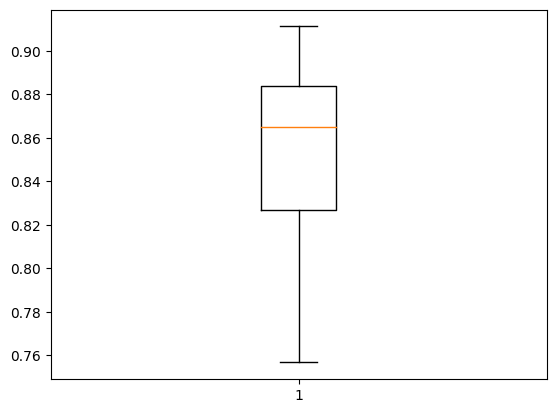

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 20, n_estimators = 250,
                            criterion = 'friedman_mse')

rfr.fit(x_train, y_train)

from sklearn import metrics
print('R2:',metrics.r2_score(y_train, rfr.predict(x_train)))
# KFold
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=30)
scores = cross_val_score(rfr, x, y, cv = kf)
print('')
print(f'R2 Values for KFold = 30:\n {scores}')
print('')
print(f'R2 average : {np.average(scores)}')
print('')
# Visual Display
import matplotlib.pyplot as plt

plt.boxplot(scores)

Adaboost DecisionTree Regressor

R2: 0.9417178748534685

R2 Values for KFold = 30:
 [0.89886526 0.85737127 0.84895954 0.81033708 0.86782179 0.8687307
 0.76743362 0.76211845 0.80305945 0.85695815 0.86138922 0.85567994
 0.87811056 0.86704383 0.91170838 0.83821138 0.80835926 0.81266338
 0.85162753 0.86826967 0.74075927 0.89465835 0.81225842 0.84981274
 0.88766064 0.78843204 0.85384772 0.89715647 0.8641406  0.84362416]

R2 average : 0.844235629511176



{'whiskers': [<matplotlib.lines.Line2D at 0x7d9c09c106d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9c09c11240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9c09c10880>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9c09c12830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9c09c10dc0>],
 'means': []}

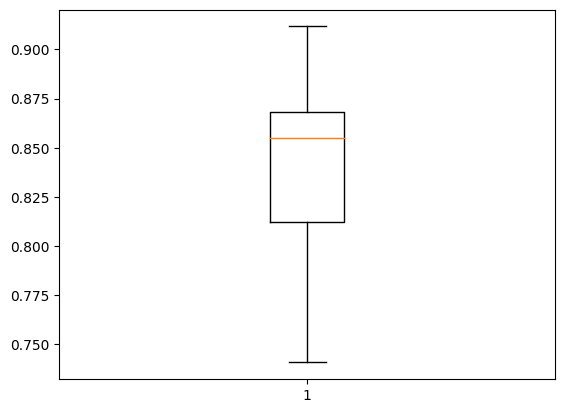

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor(max_depth=20, criterion='friedman_mse')
adar = AdaBoostRegressor(n_estimators=250, base_estimator=tr,
                         learning_rate=0.05)

adar.fit(x_train, y_train)

from sklearn import metrics
print('R2:',metrics.r2_score(y_train, adar.predict(x_train)))
# KFold
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=30)
scores = cross_val_score(adar, x, y, cv = kf)
print('')
print(f'R2 Values for KFold = 30:\n {scores}')
print('')
print(f'R2 average : {np.average(scores)}')
print('')
# Visual Display
import matplotlib.pyplot as plt

plt.boxplot(scores)

# Step 14 - Selecting The Best Regression Model

Out of the previouse ML alogrythims Random Forest Regressor is the best as it has a high R2 Value and has a high consistancy as its 50th quartile has a low range.

Step 14.1 - Training the model on the entire dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 20, n_estimators = 250,
                            criterion = 'friedman_mse')

rfr.fit(x, y)

from sklearn import metrics
print('R2:',metrics.r2_score(y_train, rfr.predict(x_train)))
# KFold
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=30)
scores = cross_val_score(rfr, x, y, cv = kf)
print('')
print(f'R2 Values for KFold = 30:\n {scores}')
print('')
print(f'R2 average : {np.average(scores)}')
print('')
# Visual Display
import matplotlib.pyplot as plt

plt.boxplot(scores)

NameError: name 'x' is not defined

# Step 15 - Deployment Of The Best Model

In [ ]:
import pickle
import os

rfr_final = rfr.fit(x,y)

with open('Final_RFR_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(rfr_final, fileWriteStream)
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

In [ ]:
#Predcition Function
def predict_price(Year, Engine, Power):
  import pandas as pd
  data = pd.DataFrame(data=[[Year, Engine, Power]],
                      columns=['Year', 'Engine', 'Power'])

  import pickle
  with open('Final_RFR_Model.pkl', 'rb') as fileReadStream:
    rfr=pickle.load(fileReadStream)
    fileReadStream.close()

  return rfr.predict(data)


In [ ]:
predict_price(2020, 2000, 140.3)

array([15.90687184])

# GITHUB Repisitory

https://github.com/Beefymouse/Assignment-9_ST1-ST1G-Capstone